# Breast Histopathology Images
Las imágenes proporcionadas en https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images/data tienen una dimensión de 50x50 y están a color (RGB). 

In [1]:
import os
import zipfile
import random
import shutil
import glob
import numpy as np
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from PIL import Image

## Pre-procesamiento

In [2]:
breast_imgs = glob.glob('breast-histopathology-images/IDC_regular_ps50_idx5/**/**.png', recursive = True)

In [3]:
for imgname in breast_imgs[:5]:
    print(imgname)    

breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
breast-histopathology-images/IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png


Si dejamos "shutil.copy" crearemos un duplicado de las imágenes en las carpetas especificadas, lo cual no es recomendable correr si ya lo hicimos una vez

In [4]:
non_cancer_imgs = []
cancer_imgs = []

for img in breast_imgs:
    if img[-5] == '0':
        non_cancer_imgs.append(img)
    elif img[-5] == '1':
        cancer_imgs.append(img)

# Seleccionar una muestra equilibrada de imágenes sin cáncer
random.seed(1)
non_cancer_sample = random.sample(non_cancer_imgs, min(len(non_cancer_imgs), 88786))

non_cancer_num = len(non_cancer_sample)
cancer_num = len(cancer_imgs) 
total_img_num = non_cancer_num + cancer_num

# Mostrar 
print('Número de imágenes sin cáncer: {}'.format(non_cancer_num))
print('Número de imágenes con cáncer: {}'.format(cancer_num))
print('Total de imágenes: {}'.format(total_img_num))



Número de imágenes sin cáncer: 88786
Número de imágenes con cáncer: 78786
Total de imágenes: 167572


In [35]:
carpeta_nocancer = 'no-cancer/'

for img in non_cancer_sample:
    shutil.copy(img, carpeta_nocancer)


In [7]:
carpeta_cancer = 'cancer/'

for img in cancer_imgs:
    shutil.copy(img, carpeta_cancer)


In [5]:
imagenes_carpeta_cancer = glob.glob('cancer/**.png', recursive = True)
imagenes_carpeta_nocancer = glob.glob('no-cancer/**.png', recursive = True)

print('Imágenes de carpeta cancer: {}' .format(len(imagenes_carpeta_cancer)))
print('Imágenes de carpeta no-cancer: {}' .format(len(imagenes_carpeta_nocancer)))

Imágenes de carpeta cancer: 88786
Imágenes de carpeta no-cancer: 88786


In [19]:
random.seed(1)
cancer_sample = random.sample(cancer_imgs, 11214)
# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Generar imágenes aumentadas y guardarlas en el directorio de salida
for img_path in cancer_sample:
    img = Image.open(img_path)  
    img = img.resize((50, 50))  
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape)

    i = 0
    for batch in datagen.flow(img_array, batch_size=1, 
                              save_to_dir=carpeta_cancer, 
                              save_prefix='mod',
                              save_format='png'):
        i += 1
        if i >= 5:  
            break

print(f"Imágenes aumentadas guardadas en {carpeta_cancer}")

imagenes_carpeta_cancer = glob.glob('cancer/**.png', recursive = True)
print('Imágenes de carpeta cancer: {}' .format(len(imagenes_carpeta_cancer)))

Imágenes aumentadas guardadas en cancer/


In [6]:
imagenes_carpeta_cancer = glob.glob('cancer/**.png', recursive = True)

print('Imágenes de carpeta cancer: {}' .format(len(imagenes_carpeta_cancer)))


Imágenes de carpeta cancer: 88786


In [7]:

non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer 
        
total_img_num = non_cancer_num + cancer_num
        
print('Número de imágenes sin cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Número de imágenes cancer : {}' .format(cancer_num))   # images of cancer 
print('Total de imágenes : {}' .format(total_img_num))

Número de imágenes sin cancer: 198738
Número de imágenes cancer : 78786
Total de imágenes : 277524


In [2]:
carpeta_nocancer = 'no-cancer/'
carpeta_cancer = 'cancer/'
entrenamiento_cancer = 'entrenamiento/cancer/'
entrenamiento_nocancer = 'entrenamiento/nocancer/'
test_cancer = 'test/cancer/'
test_nocancer = 'test/nocancer/'

In [7]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

Separamos los datos (imágenes) para entrenamiento y para test. Solo hacerlo una vez

In [43]:
split_size = .8
random.seed(1)
split_data(carpeta_cancer, entrenamiento_cancer, test_cancer, split_size)
split_data(carpeta_nocancer, entrenamiento_nocancer, test_nocancer, split_size)

In [44]:
entrenamiento_cancer = 'entrenamiento/cancer/'
entrenamiento_nocancer = 'entrenamiento/nocancer/'
test_cancer = 'test/cancer/'
test_nocancer = 'test/nocancer/'

datos_entrenamiento_cancer = glob.glob('entrenamiento/cancer/**.png', recursive = True)
datos_entrenamiento_nocancer = glob.glob('entrenamiento/nocancer/**.png', recursive = True)
datos_test_cancer = glob.glob('test/cancer/**.png', recursive = True)
datos_test_nocancer = glob.glob('test/nocancer/**.png', recursive = True)


print('Imágenes de entrenamiento sin cancer: {}' .format(len(datos_entrenamiento_cancer)))
print('Imágenes de entrenamiento con cancer: {}' .format(len(datos_entrenamiento_nocancer)))
print('Imágenes de entrenamiento total: {}' .format(len(datos_entrenamiento_nocancer)+len(datos_entrenamiento_cancer)))
print('Imágenes de test sin cancer: {}' .format(len(datos_test_cancer)))
print('Imágenes de test con cancer: {}' .format(len(datos_test_nocancer)))
print('Imágenes de test total: {}' .format(len(datos_test_nocancer)+len(datos_test_cancer)))

Imágenes de entrenamiento sin cancer: 71028
Imágenes de entrenamiento con cancer: 71028
Imágenes de entrenamiento total: 142056
Imágenes de test sin cancer: 17758
Imágenes de test con cancer: 17758
Imágenes de test total: 35516


## RNC

In [3]:
TRAINING_DIR = "entrenamiento/"
 
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(50, 50))

VALIDATION_DIR = "test/"

validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(50, 50))

Found 142056 images belonging to 2 classes.
Found 35516 images belonging to 2 classes.


In [23]:

print(train_generator.n)

print(validation_generator.n)

142056
35516


In [10]:
total_muestras = len(train_generator)  
tamano_lote = train_generator.batch_size
numero_de_lotes = total_muestras // tamano_lote
print(total_muestras)
print(tamano_lote)
print(numero_de_lotes)

1421
100
14


### Modelo 1

In [111]:
checkpoint = ModelCheckpoint('Pesos/Modelo1/pesos_del_modelo_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [109]:
# Tomado del ejemplo gatos y perros

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [142]:
history = model.fit(train_generator,
                              steps_per_epoch= 1000,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint)

1000/1000 [==============================] - 145s 145ms/step - loss: 0.5238 - accuracy: 0.7511 - val_loss: 0.4473 - val_accuracy: 0.7999


In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 64)         

In [38]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


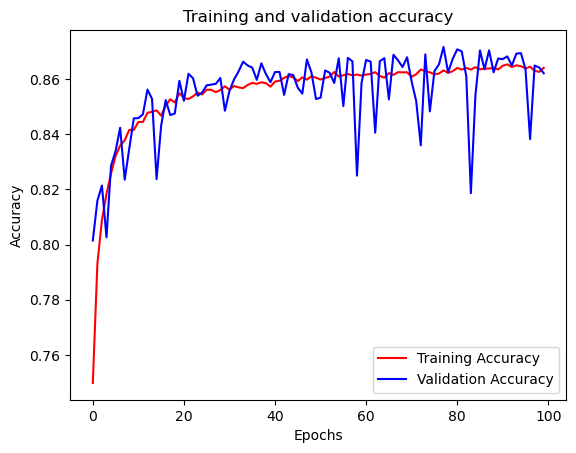

In [39]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()  

plt.show()

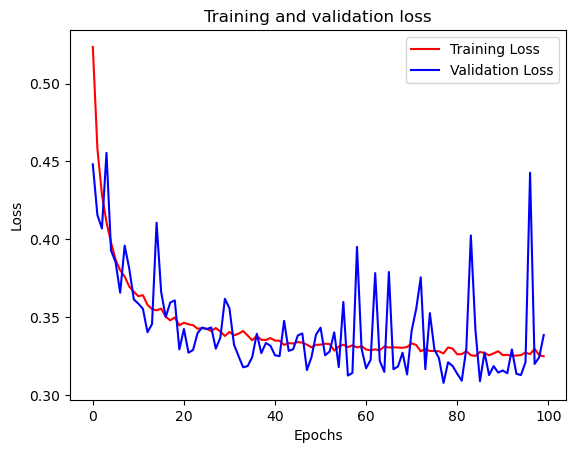

In [40]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

### Modelo 2

In [125]:
checkpoint2 = ModelCheckpoint('Pesos/Modelo2/pesos_del_modelo2_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [126]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [127]:
history2 = model2.fit(train_generator,
                              steps_per_epoch= 1000,
                              epochs=70,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint2)

Epoch 1/10
100/100 [==============================] - 53s 523ms/step - loss: 0.8723 - accuracy: 0.7591 - val_loss: 0.7818 - val_accuracy: 0.5584
Epoch 2/10
100/100 [==============================] - 52s 519ms/step - loss: 0.4727 - accuracy: 0.7902 - val_loss: 0.6076 - val_accuracy: 0.7214
Epoch 3/10
100/100 [==============================] - 52s 520ms/step - loss: 0.4453 - accuracy: 0.8066 - val_loss: 0.5835 - val_accuracy: 0.7664
Epoch 4/10
100/100 [==============================] - 52s 522ms/step - loss: 0.4393 - accuracy: 0.8077 - val_loss: 0.6689 - val_accuracy: 0.6299
Epoch 5/10
100/100 [==============================] - 51s 515ms/step - loss: 0.4290 - accuracy: 0.8169 - val_loss: 0.4445 - val_accuracy: 0.8024
Epoch 6/10
100/100 [==============================] - 51s 516ms/step - loss: 0.4195 - accuracy: 0.8164 - val_loss: 0.4260 - val_accuracy: 0.8184
Epoch 7/10
100/100 [==============================] - 51s 514ms/step - loss: 0.4237 - accuracy: 0.8180 - val_loss: 0.9838 - val_ac

In [128]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 46, 46, 32)        2432      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_10 (Ba  (None, 23, 23, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 10, 10, 64)        0         
 ng2D)                                                           
                                                      

In [129]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc2=history2.history['accuracy']
val_acc2=history2.history['val_accuracy']
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']

epochs2=range(len(acc2)) # Get number of epochs


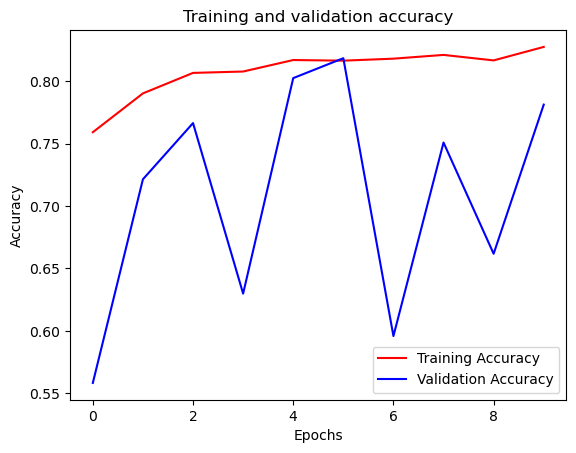

In [130]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs2, acc2, 'r', label = "Training Accuracy")
plt.plot(epochs2, val_acc2, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()  

plt.show()


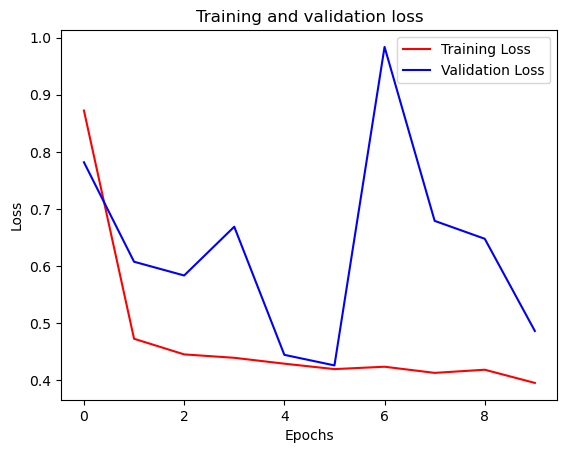

In [131]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs2, loss2, 'r', label = "Training Loss")
plt.plot(epochs2, val_loss2, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  

plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

### Modelo 3

In [132]:
checkpoint3 = ModelCheckpoint('Pesos/Modelo3/pesos_del_modelo3_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [5]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [133]:
history3 = model3.fit(train_generator,
                              steps_per_epoch= 1000,
                              epochs=70,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint3)

Epoch 1/3
1000/1000 [==============================] - 297s 297ms/step - loss: 0.3446 - accuracy: 0.8587 - val_loss: 0.3234 - val_accuracy: 0.8659
Epoch 2/3
1000/1000 [==============================] - 296s 296ms/step - loss: 0.3484 - accuracy: 0.8588 - val_loss: 0.3697 - val_accuracy: 0.8410
Epoch 3/3
1000/1000 [==============================] - 285s 285ms/step - loss: 0.3519 - accuracy: 0.8576 - val_loss: 0.3169 - val_accuracy: 0.8641


In [134]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 256)         0

In [135]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 =history3.history['loss']
val_loss3 =history3.history['val_loss']

epochs3=range(len(acc3)) # Get number of epochs


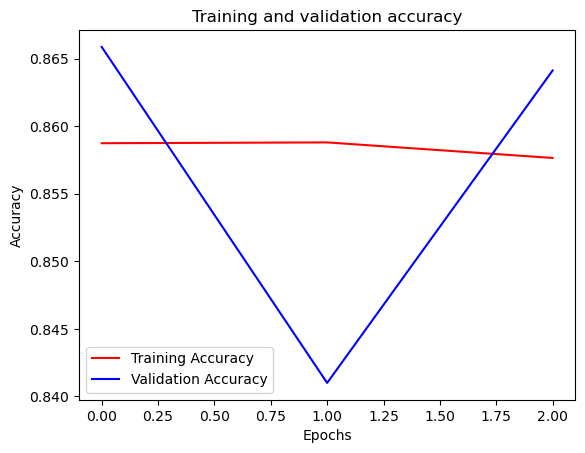

In [136]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs3, acc3, 'r', label = "Training Accuracy")
plt.plot(epochs3, val_acc3, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()  

plt.show()


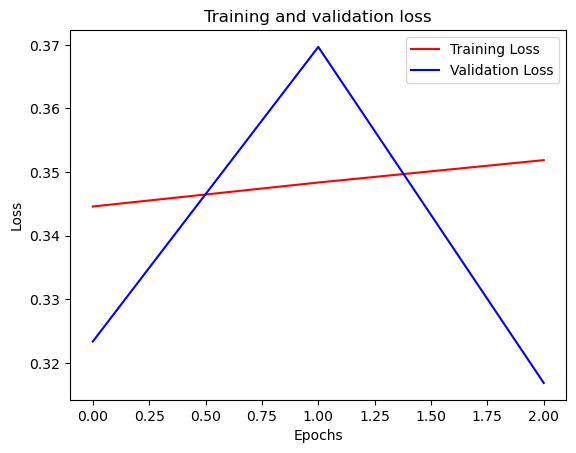

In [137]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs3, loss3, 'r', label = "Training Loss")
plt.plot(epochs3, val_loss3, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  

plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

### Modelo 4

In [140]:
checkpoint4 = ModelCheckpoint('Pesos/Modelo4/pesos_del_modelo4_epoch_{epoch:02d}.h5', 
                             save_weights_only=True, 
                             save_best_only=False)

In [138]:

model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model4.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [141]:
history4 = model4.fit(train_generator,
                              steps_per_epoch= 1000,
                              epochs=70,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=checkpoint4)

1000/1000 [==============================] - 184s 183ms/step - loss: 0.4314 - accuracy: 0.8150 - val_loss: 0.5289 - val_accuracy: 0.7372


In [99]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 49, 49, 32)        416       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 4, 4, 128)        

In [10]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs4=range(len(acc4)) # Get number of epochs


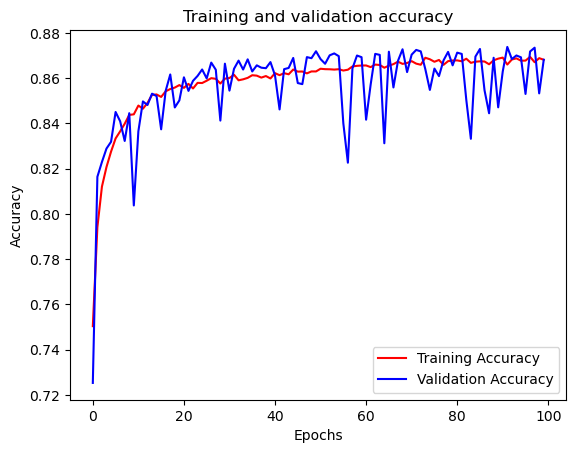

In [11]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs4, acc4, 'r', label = "Training Accuracy")
plt.plot(epochs4, val_acc4, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()  

plt.show()


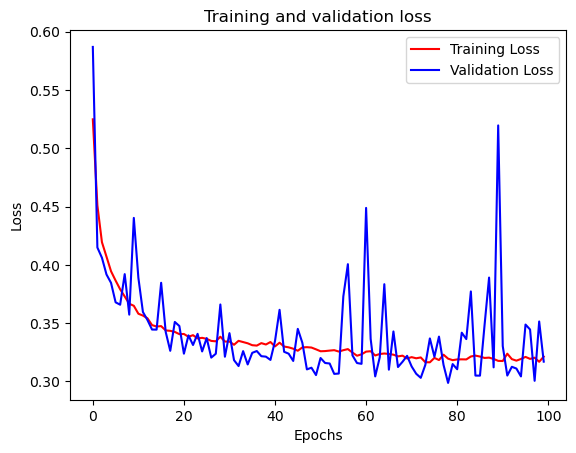

In [12]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs4, loss4, 'r', label = "Training Loss")
plt.plot(epochs4, val_loss4, 'b', label = "Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  

plt.show()
# Desired output. Charts with training and validation metrics. No crash :)

### Modelo 5: El de internet

In [119]:
model5 = tf.keras.Sequential([
    # Convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 2x2 pool size and default stride (2)
    tf.keras.layers.MaxPooling2D(strides=2),
    
    # Convolutional layer with 64 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Flatten the output to prepare for fully connected layers
    tf.keras.layers.Flatten(),
    
    # Fully connected layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # Output layer with 2 units (binary classification) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

model5.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
history5 = model5.fit(train_generator,
                              steps_per_epoch= 100,
                              epochs=3,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/3


ValueError: in user code:

    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [121]:
history5 = model5.fit(train_generator,
                    validation_data = validation_generator ,
                    epochs = 25,
                    batch_size = 75,
                    callbacks=None)

Epoch 1/25


ValueError: in user code:

    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\gabop\anaconda3\Lib\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


## Matriz de confusión 

In [92]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [114]:
TEST_DIR= "test"

test_datagen = ImageDataGenerator()

# Generador de flujo de directorios para las imágenes de prueba
prueba = test_datagen.flow_from_directory(TEST_DIR,
                                          batch_size=100,
                                          class_mode=None,
                                          target_size=(50, 50),
                                          shuffle=False) 
TEST_DIR_CANCER= "test/cancer"

test_datagen = ImageDataGenerator()

# Generador de flujo de directorios para las imágenes de prueba
prueba_cancer = test_datagen.flow_from_directory(TEST_DIR_CANCER,
                                          batch_size=100,
                                          class_mode=None,
                                          target_size=(50, 50),
                                          shuffle=False) 


Found 35516 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [103]:
print("Clases del conjunto de entrenamiento:", train_generator.class_indices)
print("Clases del conjunto de validación:", validation_generator.class_indices)
print("Clases del conjunto de prueba:", prueba.class_indices)

Clases del conjunto de entrenamiento: {'cancer': 0, 'nocancer': 1}
Clases del conjunto de validación: {'cancer': 0, 'nocancer': 1}
Clases del conjunto de prueba: {'cancer': 0, 'nocancer': 1}


### Modelo 1

In [74]:
pesos = model.load_weights('Pesos/Modelo1/pesos_del_modelo_epoch_95.h5')

# Predicciones para las imágenes de cáncer
predictions = model.predict(prueba)


356/356 [==============================] - 16s 44ms/step


In [89]:
# Obtener las etiquetas reales del conjunto de validación
true_labels = prueba.classes

# Crear la matriz de confusión
predicted_labels = (predictions > 0.5).astype(int)
print(predicted_labels.sum())
print(len(predicted_labels))

# Crear la matriz de confusión
confusion_mat = confusion_matrix(true_labels, predictions)


print("Matriz de Confusión:")
print(confusion_mat)

# Imprimir el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(true_labels, predicted_labels))


3
35516
Matriz de Confusión:
[[17758     0]
 [17755     3]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     17758
           1       1.00      0.00      0.00     17758

    accuracy                           0.50     35516
   macro avg       0.75      0.50      0.33     35516
weighted avg       0.75      0.50      0.33     35516



### Modelo 2

In [86]:
pesos2 = model2.load_weights('Pesos/Modelo2/pesos_del_modelo2_epoch_89.h5')

# Predicciones para las imágenes de cáncer validation_generator
predictions2 = model2.predict(prueba)


356/356 [==============================] - 14s 39ms/step


In [96]:
# Obtener las etiquetas reales del conjunto de validación
true_labels = prueba.classes

# Convertir las predicciones a etiquetas binarias (0 o 1)
predicted_labels2 = (predictions2 > 0.5).astype(int)
print(predicted_labels2.sum())
print(len(predicted_labels2))

# Crear la matriz de confusión
confusion_mat2 = confusion_matrix(true_labels, predicted_labels2)

print("Matriz de Confusión:")
print(confusion_mat2)

# Imprimir el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(true_labels, predicted_labels2))


209
35516
Matriz de Confusión:
[[17757     1]
 [17550   208]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     17758
           1       1.00      0.01      0.02     17758

    accuracy                           0.51     35516
   macro avg       0.75      0.51      0.35     35516
weighted avg       0.75      0.51      0.35     35516



### Modelo 3

In [23]:
pesos3 = model3.load_weights('Pesos/Modelo3/pesos_del_modelo3_epoch_89.h5')

# Predicciones para las imágenes de cáncer
predictions3 = model3.predict(prueba)


356/356 [==============================] - 20s 57ms/step


In [50]:
print(predictions3.transpose())

[[0. 0. 0. ... 0. 0. 0.]]


In [93]:
# Obtener las etiquetas reales del conjunto de validación
true_labels = prueba.classes

# Convertir las predicciones a etiquetas binarias (0 o 1)
predicted_labels3 = (predictions3 > 0.005).astype(int)
print(predicted_labels3.sum())
print(len(predicted_labels3))

# Crear la matriz de confusión
confusion_mat3 = confusion_matrix(true_labels, predicted_labels3)

print("Matriz de Confusión:")
print(confusion_mat3)

# Imprimir el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(true_labels, predicted_labels3))


785
35516
Matriz de Confusión:
[[17751     7]
 [16980   778]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68     17758
           1       0.99      0.04      0.08     17758

    accuracy                           0.52     35516
   macro avg       0.75      0.52      0.38     35516
weighted avg       0.75      0.52      0.38     35516



In [63]:
model3.evaluate(prueba)

356/356 [==============================] - 10s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
Y_pred = model3.predict(prueba)
Y_pred_classes = np.argmax(prueba,axis = 1) 
Y_true = np.argmax(prueba.classes,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(confusion_mtx)

### Modelo 4

In [25]:
pesos4 =model4.load_weights('Pesos/Modelo4/pesos_del_modelo4_epoch_100.h5')

# Predicciones para las imágenes de cáncer
predictions_cancer = model4.predict(train_generator)

# Predicciones para las imágenes sin cáncer
predictions_nocancer = model4.predict(train_generator)


1421/1421 [==============================] - 135s 95ms/step


In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Definir las etiquetas verdaderas
true_labels_cancer = np.array([1] * len(predictions_cancer))
true_labels_nocancer = np.array([0] * len(predictions_nocancer))

# Convertir las predicciones a etiquetas binarias (0 o 1)
predicted_labels_cancer = (predictions_cancer > 0.5).astype(int)
predicted_labels_nocancer = (predictions_nocancer > 0.5).astype(int)

# Concatenar las predicciones y etiquetas verdaderas
all_true_labels = np.concatenate([true_labels_cancer, true_labels_nocancer])
all_predicted_labels = np.concatenate([predicted_labels_cancer, predicted_labels_nocancer])

# Crear la matriz de confusión
confusion_mat = confusion_matrix(all_true_labels, all_predicted_labels)

print("Matriz de Confusión:")
print(confusion_mat)

# Imprimir el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(all_true_labels, all_predicted_labels))


Matriz de Confusión:
[[69655 72401]
 [69652 72404]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50    142056
           1       0.50      0.51      0.50    142056

    accuracy                           0.50    284112
   macro avg       0.50      0.50      0.50    284112
weighted avg       0.50      0.50      0.50    284112



In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Realizar predicciones en el conjunto de validación
# predictions = model4.predict(validation_generator)
predictions_cancer = model4.predict(validation_generator)



356/356 [==============================] - 33s 93ms/step
Matriz de Confusión:
[[11039  6719]
 [10716  7042]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56     17758
           1       0.51      0.40      0.45     17758

    accuracy                           0.51     35516
   macro avg       0.51      0.51      0.50     35516
weighted avg       0.51      0.51      0.50     35516

